In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import statsmodels.api as sm

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font)

녹지 = pd.read_csv('./데이터/Green/서울시_녹지현황.csv',encoding='utf-8')
침수흔적도 = pd.read_csv('./데이터/서울시_침수흔적도.csv',encoding='utf-8')

In [189]:
print(len(침수흔적도[침수흔적도['침수시작날짜']==20220808]))
print(len(침수흔적도[침수흔적도['침수시작날짜']==20220809]))
print(len(침수흔적도[침수흔적도['침수시작날짜']==20220810]))

8390
192
4


In [190]:
print(len(침수흔적도[침수흔적도['침수종료날짜']==20220808]))
print(len(침수흔적도[침수흔적도['침수종료날짜']==20220809]))
print(len(침수흔적도[침수흔적도['침수종료날짜']==20220810]))

0
0
0


In [191]:
침수흔적도 = 침수흔적도[(침수흔적도['침수시작날짜']>=20180101) & (침수흔적도['침수시작날짜']<=20231231)]

침수흔적도 = 침수흔적도[['자치구', '침수수심', '침수원인',
                        '침수평균해발고도', '침수면적', 
                        '침수시작날짜', '침수종료날짜', 
                        '침수시작시간', '침수종료시간',
                        '침수내용', '주소', 
                        '행정코드', 
                        '침수연도', 
                        '지오메트리']]


In [192]:
#
침수흔적도['침수시작날짜'] = 침수흔적도['침수시작날짜'].replace(2180828, 20180828)

# '침수종료날짜' 컬럼의 날짜 형식 통일
침수흔적도['침수종료날짜'] = pd.to_datetime(침수흔적도['침수종료날짜'], errors='coerce').dt.strftime('%Y%m%d')


# 'NaN'을 실제 NaN 값으로 변환
침수흔적도['침수종료날짜'] = 침수흔적도['침수종료날짜'].replace('NaN', np.nan)

# '침수종료날짜'의 NaN 값을 '침수시작날짜'로 대체
침수흔적도['침수종료날짜'] = pd.to_datetime(침수흔적도['침수종료날짜'], errors='coerce').dt.strftime('%Y%m%d')
침수흔적도['침수종료날짜'] = 침수흔적도['침수종료날짜'].fillna(침수흔적도['침수시작날짜'].astype(str))


In [193]:
# 문자열로 저장된 날짜를 정수형으로 변환
침수흔적도['침수시작날짜'] = 침수흔적도['침수시작날짜'].astype(int)
침수흔적도['침수종료날짜'] = 침수흔적도['침수종료날짜'].astype(int)

# 침수날짜 컬럼 생성: 각 행에 대해 침수 시작부터 종료까지의 모든 날짜 생성
침수흔적도['침수날짜'] = 침수흔적도.apply(
    lambda x: pd.date_range(
        start=pd.to_datetime(str(x['침수시작날짜']), format='%Y%m%d'),  
        end=pd.to_datetime(str(x['침수종료날짜']), format='%Y%m%d'),    
        freq='D'
    ).strftime('%Y%m%d').tolist(),
    axis=1
)

# explode를 사용하여 '침수날짜'의 각 날짜를 독립적인 행으로 확장
침수흔적도 = 침수흔적도.explode('침수날짜')


In [194]:
침수흔적도.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33649 entries, 0 to 9681
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   자치구       33649 non-null  object 
 1   침수수심      33649 non-null  float64
 2   침수원인      33649 non-null  object 
 3   침수평균해발고도  33649 non-null  float64
 4   침수면적      33649 non-null  float64
 5   침수시작날짜    33649 non-null  int32  
 6   침수종료날짜    33649 non-null  int32  
 7   침수시작시간    33649 non-null  int64  
 8   침수종료시간    33649 non-null  int64  
 9   침수내용      33649 non-null  object 
 10  주소        33649 non-null  object 
 11  행정코드      33649 non-null  int64  
 12  침수연도      33649 non-null  int64  
 13  지오메트리     33649 non-null  object 
 14  침수날짜      33648 non-null  object 
dtypes: float64(3), int32(2), int64(4), object(6)
memory usage: 3.9+ MB


In [195]:
녹지.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역          28 non-null     object 
 1   세부지역        28 non-null     object 
 2   총개소수        28 non-null     float64
 3   총면적         28 non-null     float64
 4   시설녹지_개소수    26 non-null     float64
 5   시설녹지_면적     26 non-null     float64
 6   일반녹지_개소수    28 non-null     float64
 7   일반녹지_면적     28 non-null     float64
 8   중앙분리대_개소수   24 non-null     float64
 9   중앙분리대_면적    24 non-null     float64
 10  교통섬_개소수     23 non-null     float64
 11  교통섬_면적      23 non-null     float64
 12  화단_개소수      22 non-null     float64
 13  화단_면적       22 non-null     float64
 14  보도부_개소수     23 non-null     float64
 15  보도부_면적      23 non-null     float64
 16  기타녹지_개소수    27 non-null     float64
 17  기타녹지_면적     27 non-null     float64
 18  지하철환기구_개소수  18 non-null     float64
 19  지하철환기구_면적   18 non-null     flo

In [196]:
# '소계'인 행을 제거
녹지 = 녹지[녹지['세부지역'] != '소계']


# NaN 값을 0으로 대체
녹지.fillna(0, inplace=True)
# '중구' 행을 찾기
중구_행 = 녹지[녹지['세부지역'] == '중구']

# '중부공원녹지사업소'와 '안전총괄실' 행을 찾기
중부공원_녹지사업소_행 = 녹지[녹지['세부지역'] == '중부공원녹지사업소']
안전총괄실_행 = 녹지[녹지['세부지역'] == '안전총괄실']

# 수치 데이터 컬럼만 선택하여 중구 행에 합산
수치_컬럼 = 녹지.columns[1:]  # 나머지 컬럼도 추가
중구_행[수치_컬럼] += 중부공원_녹지사업소_행[수치_컬럼].iloc[0] + 안전총괄실_행[수치_컬럼].iloc[0]

# '중부공원녹지사업소'와 '안전총괄실' 행을 데이터프레임에서 제거
녹지 = 녹지[~녹지['세부지역'].isin(['중부공원녹지사업소', '안전총괄실'])]

# 변경된 '중구' 행을 원본 데이터프레임에 업데이트
녹지.loc[녹지['세부지역'] == '중구', 수치_컬럼] = 중구_행[수치_컬럼]

녹지['세부지역'] = 녹지['세부지역'].replace('중구중부공원녹지사업소안전총괄실', '중구')

녹지 = 녹지.rename(columns = {'세부지역': '자치구'})


# '지역'컬럼 삭제
녹지= 녹지.drop(columns=['지역'])


# 숫자형으로 변환 가능한 컬럼들을 변환
for column in 녹지.columns:
    if column != '자치구':  # '자치구' 컬럼은 문자열로 유지
        녹지[column] = pd.to_numeric(녹지[column], errors='coerce')

녹지 = 녹지[['자치구','총개소수','총면적','시설녹지_개소수','시설녹지_면적','일반녹지_개소수','일반녹지_면적','기타녹지_개소수', '기타녹지_면적','녹지율']]

C:\Users\ciw96\AppData\Local\Temp\ipykernel_4652\1048025535.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  중구_행[수치_컬럼] += 중부공원_녹지사업소_행[수치_컬럼].iloc[0] + 안전총괄실_행[수치_컬럼].iloc[0]
C:\Users\ciw96\AppData\Local\Temp\ipykernel_4652\1048025535.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[414.0]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  녹지.loc[녹지['세부지역'] == '중구', 수치_컬럼] = 중구_행[수치_컬럼]
C:\Users\ciw96\AppData\Local\Temp\ipykernel_4652\1048025535.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1944645.0]' has dtype incompatible

In [197]:
녹지.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 1 to 25
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   자치구       25 non-null     object 
 1   총개소수      25 non-null     float64
 2   총면적       25 non-null     float64
 3   시설녹지_개소수  25 non-null     float64
 4   시설녹지_면적   25 non-null     float64
 5   일반녹지_개소수  25 non-null     float64
 6   일반녹지_면적   25 non-null     float64
 7   기타녹지_개소수  25 non-null     float64
 8   기타녹지_면적   25 non-null     float64
 9   녹지율       25 non-null     float64
dtypes: float64(9), object(1)
memory usage: 2.1+ KB


C:\Users\ciw96\AppData\Local\Temp\ipykernel_4652\2084676604.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='자치구', y='녹지율', data=녹지, palette='viridis')


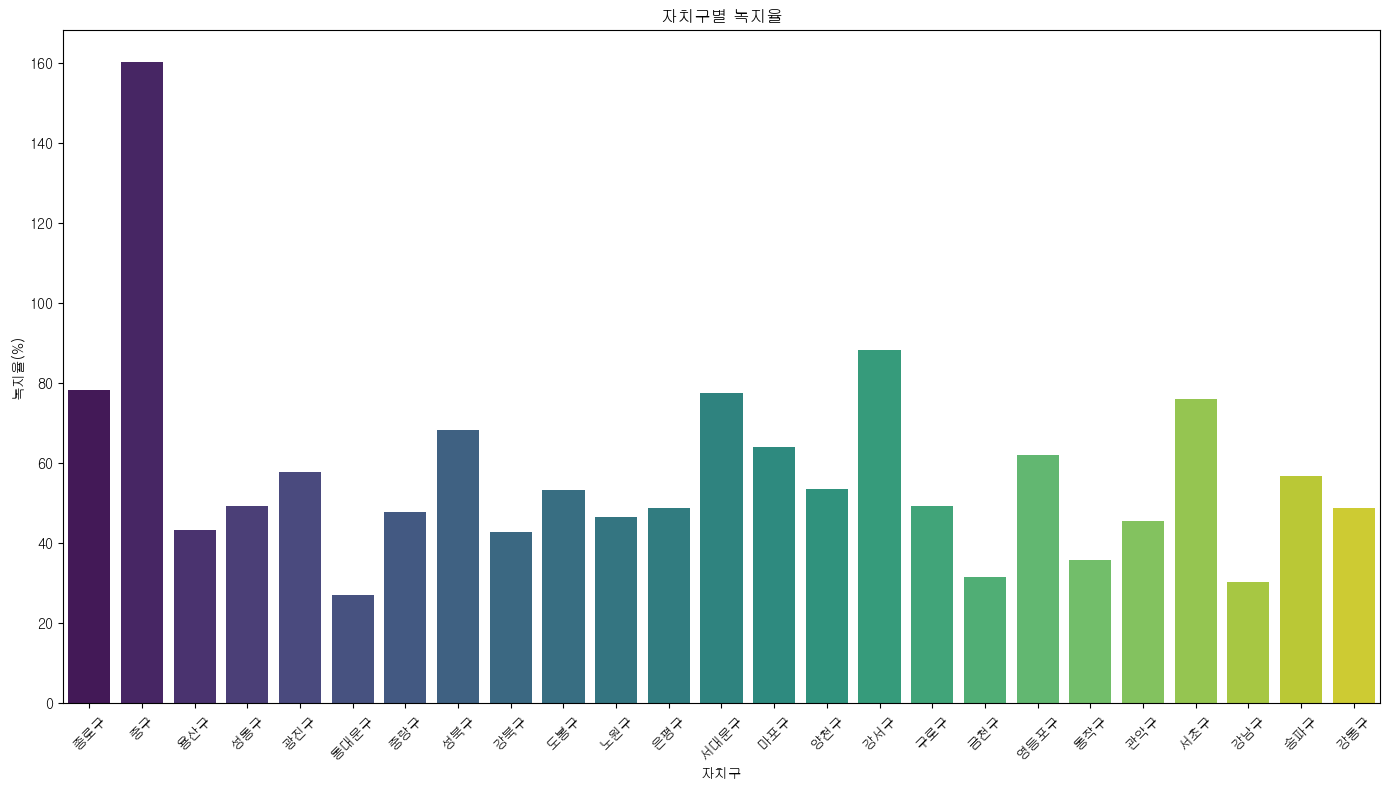

In [198]:
# 막대 그래프 그리기
plt.figure(figsize=(14, 8))
sns.barplot(x='자치구', y='녹지율', data=녹지, palette='viridis')
plt.xticks(rotation=45)
plt.title('자치구별 녹지율')
plt.xlabel('자치구')
plt.ylabel('녹지율(%)')
plt.tight_layout()
plt.show()

C:\Users\ciw96\AppData\Local\Temp\ipykernel_4652\4242699214.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='자치구', y='총면적', data=녹지, palette='viridis')


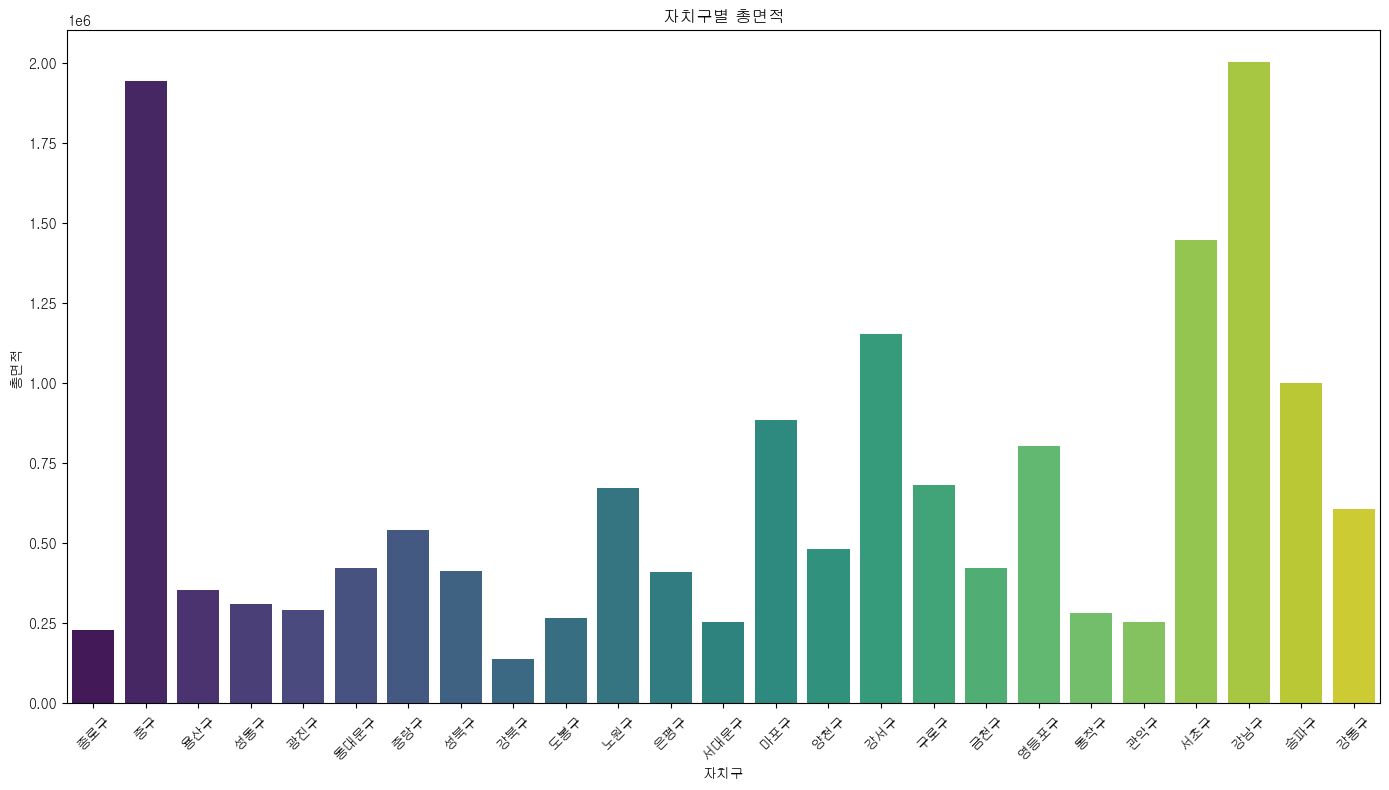

In [199]:
# 막대 그래프 그리기
plt.figure(figsize=(14, 8))
sns.barplot(x='자치구', y='총면적', data=녹지, palette='viridis')
plt.xticks(rotation=45)
plt.title('자치구별 총면적')
plt.xlabel('자치구')
plt.ylabel('총면적')
plt.tight_layout()
plt.show()

C:\Users\ciw96\AppData\Local\Temp\ipykernel_4652\22423957.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='자치구', y='일반녹지_면적', data=녹지, palette='viridis')


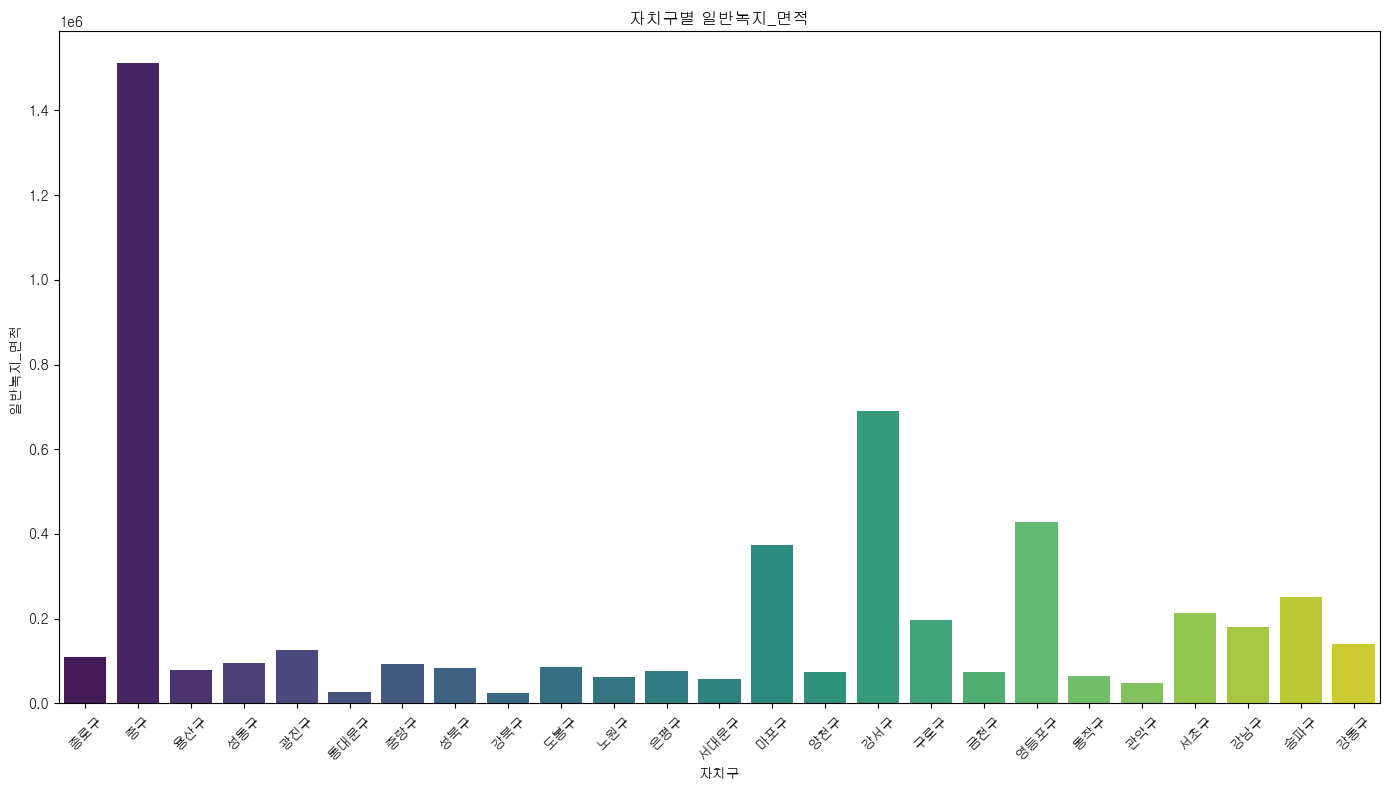

In [200]:
# 막대 그래프 그리기
plt.figure(figsize=(14, 8))
sns.barplot(x='자치구', y='일반녹지_면적', data=녹지, palette='viridis')
plt.xticks(rotation=45)
plt.title('자치구별 일반녹지_면적')
plt.xlabel('자치구')
plt.ylabel('일반녹지_면적 ')
plt.tight_layout()
plt.show()

In [201]:
from functools import reduce

dfs = [침수흔적도,녹지]

df1 = reduce(lambda left, right:pd.merge(left,right, on='자치구',how='outer'),dfs)

df1

,자치구,침수수심,침수원인,침수평균해발고도,침수면적,침수시작날짜,침수종료날짜,침수시작시간,침수종료시간,침수내용,...,침수날짜,총개소수,총면적,시설녹지_개소수,시설녹지_면적,일반녹지_개소수,일반녹지_면적,기타녹지_개소수,기타녹지_면적,녹지율
0,강남구,0.50,2022년 8.8 ~17. 호우,19.67,44306.00,20220808.0,20220808.0,20.0,23.0,내수침수,...,20220808,423.0,2002549.5,94.0,411351.8,116.0,179994.0,24.0,13876.0,30.222564
1,강남구,0.30,2022년 8.8 ~17. 호우,61.95,2356.73,20220808.0,20220808.0,20.0,23.0,내수침수,...,20220808,423.0,2002549.5,94.0,411351.8,116.0,179994.0,24.0,13876.0,30.222564
2,강남구,0.30,2022년 8.8 ~17. 호우,33.15,2015.54,20220808.0,20220808.0,20.0,23.0,내수침수,...,20220808,423.0,2002549.5,94.0,411351.8,116.0,179994.0,24.0,13876.0,30.222564
3,강남구,0.30,2022년 8.8 ~17. 호우,33.15,2177.61,20220808.0,20220808.0,20.0,23.0,내수침수,...,20220808,423.0,2002549.5,94.0,411351.8,116.0,179994.0,24.0,13876.0,30.222564
4,강남구,0.30,2022년 8.8 ~17. 호우,36.94,3.01,20220808.0,20220808.0,20.0,23.0,내수침수,...,20220808,423.0,2002549.5,94.0,411351.8,116.0,179994.0,24.0,13876.0,30.222564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33645,중랑구,0.01,2022년 8.8 ~17. 호우,15.00,12.00,20220830.0,20220830.0,10.0,12.0,내수침수,...,20220830,294.0,539974.0,31.0,128636.0,129.0,92593.0,41.0,37152.0,47.850637
33646,중랑구,0.01,2022년 9.3~7. 제11호 태풍 힌남노,31.00,40.22,20220905.0,20220905.0,9.0,10.0,내수침수,...,20220905,294.0,539974.0,31.0,128636.0,129.0,92593.0,41.0,37152.0,47.850637
33647,중랑구,0.01,2022년 8.8 ~17. 호우,33.00,10.00,20220817.0,20220817.0,14.0,16.0,내수침수,...,20220817,294.0,539974.0,31.0,128636.0,129.0,92593.0,41.0,37152.0,47.850637
33648,중랑구,0.01,2022년 9.3~7. 제11호 태풍 힌남노,15.00,73.79,20220905.0,20220905.0,9.0,12.0,내수침수,...,20220905,294.0,539974.0,31.0,128636.0,129.0,92593.0,41.0,37152.0,47.850637


In [202]:
df1[df1['침수수심'].isna()]

,자치구,침수수심,침수원인,침수평균해발고도,침수면적,침수시작날짜,침수종료날짜,침수시작시간,침수종료시간,침수내용,...,침수날짜,총개소수,총면적,시설녹지_개소수,시설녹지_면적,일반녹지_개소수,일반녹지_면적,기타녹지_개소수,기타녹지_면적,녹지율
6177,광진구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,250.0,290567.0,7.0,20796.0,67.0,125495.0,47.0,22061.0,57.939133


In [203]:
df1.isnull().sum()

자치구         0
침수수심        1
침수원인        1
침수평균해발고도    1
침수면적        1
침수시작날짜      1
침수종료날짜      1
침수시작시간      1
침수종료시간      1
침수내용        1
주소          1
행정코드        1
침수연도        1
지오메트리       1
침수날짜        2
총개소수        0
총면적         0
시설녹지_개소수    0
시설녹지_면적     0
일반녹지_개소수    0
일반녹지_면적     0
기타녹지_개소수    0
기타녹지_면적     0
녹지율         0
dtype: int64

In [204]:
df1 = df1.dropna()

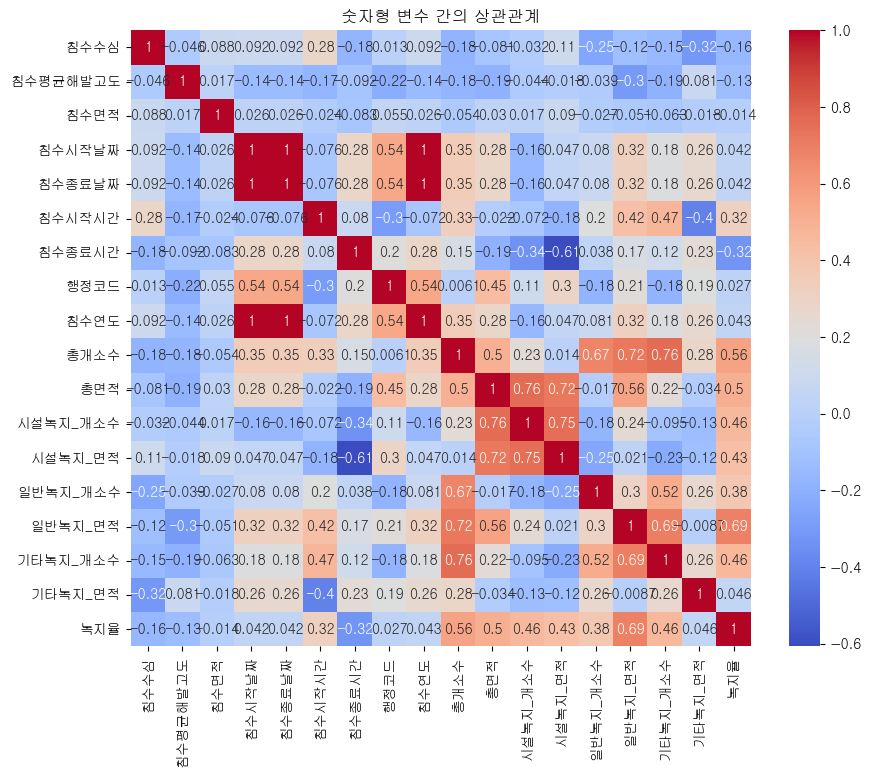

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt

# 숫자형 변수만 선택
numeric_df = df1.select_dtypes(include=['float64', 'int64'])

# 숫자형 변수 간의 상관관계 행렬
corr_matrix = numeric_df.corr()



plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('숫자형 변수 간의 상관관계')
plt.show()



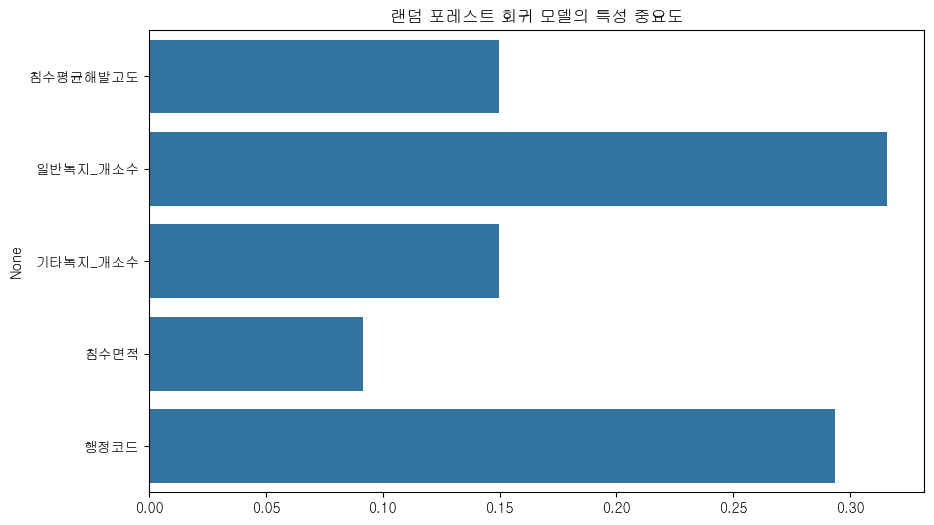

In [206]:
# 비선형 관계 분석 (랜덤 포레스트 회귀)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


# NaN 및 무한대 값 제거
merged_df = df1.replace([np.inf, -np.inf], np.nan)
merged_df = df1.dropna(subset=['침수평균해발고도', '일반녹지_개소수', '기타녹지_개소수','침수면적', '행정코드', '침수수심'])

# 독립 변수와 종속 변수 설정
X = merged_df[['침수평균해발고도', '일반녹지_개소수', '기타녹지_개소수','침수면적', '행정코드']]
y = merged_df['침수수심']

# 데이터 분할 (훈련/테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 회귀 모델 학습
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 특성 중요도 확인
importances = model.feature_importances_
feature_names = X.columns

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('랜덤 포레스트 회귀 모델의 특성 중요도')
plt.show()


In [207]:
# 침수수심에 대한 다중선형회귀 분석
import numpy as np
import pandas as pd
import statsmodels.api as sm

# NaN 및 무한대 값 제거
merged_df = df1.replace([np.inf, -np.inf], np.nan)
merged_df = df1.dropna(subset=['침수평균해발고도', '일반녹지_개소수', '기타녹지_개소수','침수면적', '행정코드', '침수수심'])

# 독립 변수와 종속 변수 설정
X = merged_df[['침수평균해발고도', '일반녹지_개소수', '기타녹지_개소수','침수면적', '행정코드']]
y = merged_df['침수수심']

# 상수항 추가
X = sm.add_constant(X)

# 회귀 모델 학습
model = sm.OLS(y, X).fit()

# 모델 결과 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   침수수심   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     571.7
Date:                Thu, 08 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:30:26   Log-Likelihood:                 6862.0
No. Observations:               33648   AIC:                        -1.371e+04
Df Residuals:                   33642   BIC:                        -1.366e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7048      0.109     15.674      0.0

In [208]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# 의사결정나무 모델 학습
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f'의사결정나무 MSE: {mse_tree}')

의사결정나무 MSE: 0.0011582278557782696


In [209]:
from sklearn.ensemble import RandomForestRegressor

# 랜덤 포레스트 모델 학습
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'랜덤 포레스트 MSE: {mse_rf}')

랜덤 포레스트 MSE: 0.0013735769201074863


In [210]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 학습
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'선형 회귀 MSE: {mse_lr}')

선형 회귀 MSE: 0.039792927793003724


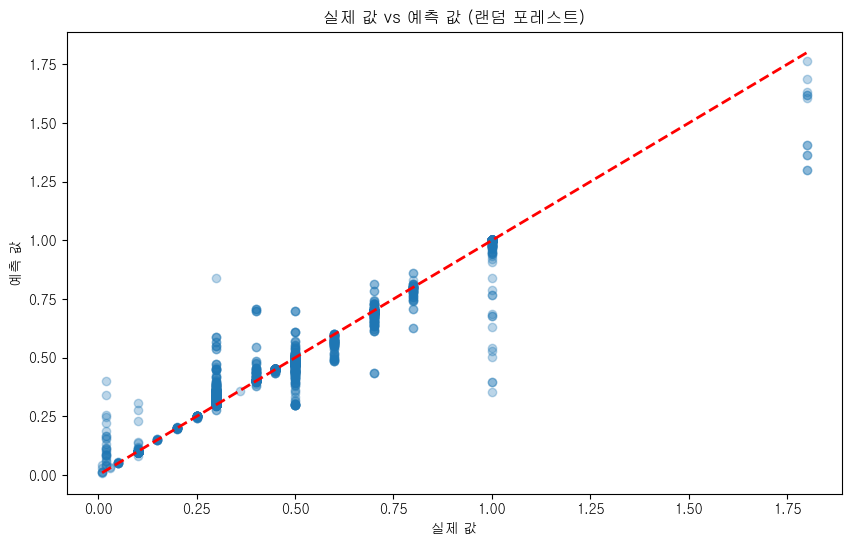

In [211]:
# 실제 값과 예측 값 비교 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
plt.xlabel('실제 값')
plt.ylabel('예측 값')
plt.title('실제 값 vs 예측 값 (랜덤 포레스트)')
plt.show()

In [212]:
# from sklearn.model_selection import GridSearchCV

# 의사결정나무 하이퍼파라미터 튜닝
# param_grid_tree = {
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
 #    'min_samples_leaf': [1, 2, 4]
# }

# grid_search_tree = GridSearchCV(tree_model, param_grid_tree, cv=5, scoring='neg_mean_squared_error')
# grid_search_tree.fit(X_train, y_train)
# best_tree_model = grid_search_tree.best_estimator_
# print(f'최적의 의사결정나무 하이퍼파라미터: {grid_search_tree.best_params_}')

# 랜덤 포레스트 하이퍼파라미터 튜닝
# param_grid_rf = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
# grid_search_rf.fit(X_train, y_train)
# best_rf_model = grid_search_rf.best_estimator_
# print(f'최적의 랜덤 포레스트 하이퍼파라미터: {grid_search_rf.best_params_}')


In [213]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
# 침수 & 하천
# 데이터 준비
numeric_df = df1.select_dtypes(include=['float64', 'int64'])

X = numeric_df.drop(columns=['침수수심'])
y = df1['침수수심']

# 데이터 분할 (학습용 80%, 테스트용 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [214]:
from sklearn.model_selection import cross_val_score

# 의사결정나무 교차 검증
cv_scores_tree = cross_val_score(tree_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'의사결정나무 평균 MSE (교차 검증): {-cv_scores_tree.mean()}')

# 랜덤 포레스트 교차 검증
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'랜덤 포레스트 평균 MSE (교차 검증): {-cv_scores_rf.mean()}')
 

의사결정나무 평균 MSE (교차 검증): 0.0018859277074779412
랜덤 포레스트 평균 MSE (교차 검증): 0.0017447879919821024


In [215]:
df1['지오메트리']

0        POLYGON ((958266.7548537395 1944412.821693935,...
1        POLYGON ((961656.4046361586 1941847.951360239,...
2        POLYGON ((961469.0843631719 1942206.137323901,...
3        POLYGON ((961540.5445842013 1942201.814513462,...
4        POLYGON ((961394.0973640293 1942081.091478479,...
                               ...                        
33645    POLYGON ((962668.1144004177 1955619.27428962, ...
33646    POLYGON ((964369.3664106731 1956238.756100814,...
33647    POLYGON ((964276.5482719766 1956221.556578399,...
33648    POLYGON ((962431.5509421444 1956419.779457934,...
33649    POLYGON ((964409.3988623659 1956545.591056199,...
Name: 지오메트리, Length: 33648, dtype: object

In [216]:
import folium
from shapely import wkt
from shapely.geometry import Point
from geopy.geocoders import Nominatim
from pyproj import Transformer
import geopandas as gpd

In [217]:
df1

,자치구,침수수심,침수원인,침수평균해발고도,침수면적,침수시작날짜,침수종료날짜,침수시작시간,침수종료시간,침수내용,...,침수날짜,총개소수,총면적,시설녹지_개소수,시설녹지_면적,일반녹지_개소수,일반녹지_면적,기타녹지_개소수,기타녹지_면적,녹지율
0,강남구,0.50,2022년 8.8 ~17. 호우,19.67,44306.00,20220808.0,20220808.0,20.0,23.0,내수침수,...,20220808,423.0,2002549.5,94.0,411351.8,116.0,179994.0,24.0,13876.0,30.222564
1,강남구,0.30,2022년 8.8 ~17. 호우,61.95,2356.73,20220808.0,20220808.0,20.0,23.0,내수침수,...,20220808,423.0,2002549.5,94.0,411351.8,116.0,179994.0,24.0,13876.0,30.222564
2,강남구,0.30,2022년 8.8 ~17. 호우,33.15,2015.54,20220808.0,20220808.0,20.0,23.0,내수침수,...,20220808,423.0,2002549.5,94.0,411351.8,116.0,179994.0,24.0,13876.0,30.222564
3,강남구,0.30,2022년 8.8 ~17. 호우,33.15,2177.61,20220808.0,20220808.0,20.0,23.0,내수침수,...,20220808,423.0,2002549.5,94.0,411351.8,116.0,179994.0,24.0,13876.0,30.222564
4,강남구,0.30,2022년 8.8 ~17. 호우,36.94,3.01,20220808.0,20220808.0,20.0,23.0,내수침수,...,20220808,423.0,2002549.5,94.0,411351.8,116.0,179994.0,24.0,13876.0,30.222564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33645,중랑구,0.01,2022년 8.8 ~17. 호우,15.00,12.00,20220830.0,20220830.0,10.0,12.0,내수침수,...,20220830,294.0,539974.0,31.0,128636.0,129.0,92593.0,41.0,37152.0,47.850637
33646,중랑구,0.01,2022년 9.3~7. 제11호 태풍 힌남노,31.00,40.22,20220905.0,20220905.0,9.0,10.0,내수침수,...,20220905,294.0,539974.0,31.0,128636.0,129.0,92593.0,41.0,37152.0,47.850637
33647,중랑구,0.01,2022년 8.8 ~17. 호우,33.00,10.00,20220817.0,20220817.0,14.0,16.0,내수침수,...,20220817,294.0,539974.0,31.0,128636.0,129.0,92593.0,41.0,37152.0,47.850637
33648,중랑구,0.01,2022년 9.3~7. 제11호 태풍 힌남노,15.00,73.79,20220905.0,20220905.0,9.0,12.0,내수침수,...,20220905,294.0,539974.0,31.0,128636.0,129.0,92593.0,41.0,37152.0,47.850637


In [218]:
# 데이터 분할 (학습용 80%, 테스트용 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [219]:
# 랜덤 포레스트 모델 학습
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

17


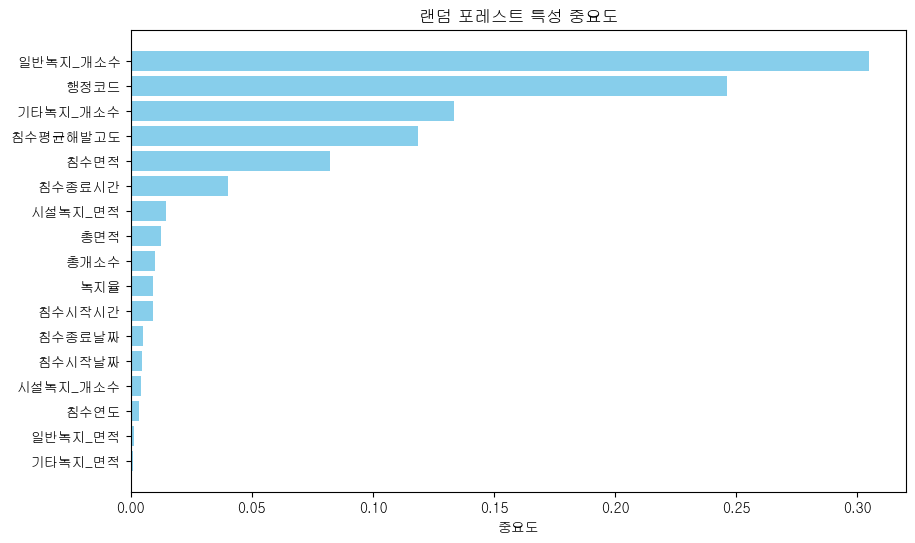

In [220]:
import matplotlib.pyplot as plt
import pandas as pd

# 랜덤 포레스트 특성 중요도 시각화
feature_importance_rf = rf_model.feature_importances_
print(len(feature_importance_rf))
importance_df_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance_rf
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df_rf['Feature'], importance_df_rf['Importance'], color='skyblue')
plt.xlabel('중요도')
plt.title('랜덤 포레스트 특성 중요도')
plt.gca().invert_yaxis()
plt.show()


In [221]:
# 예측
y_pred_rf = rf_model.predict(X_test)

In [222]:
import geopandas as gpd
from shapely import wkt
from pyproj import Transformer

# 데이터 로드 및 WKT 문자열을 Geometry 객체로 변환
df1['geometry'] = df1['지오메트리'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(df1, geometry='geometry')

# 지리적 좌표 변환 함수
def get_lat_long(geometry, epsg_code="epsg:5179"):
    transformer = Transformer.from_crs(epsg_code, "epsg:4326", always_xy=True)
    centroid = geometry.centroid
    lon, lat = transformer.transform(centroid.x, centroid.y)
    return lat, lon

# 변환 실행
test_data = gdf.loc[X_test.index].copy()
test_data['위도'], test_data['경도'] = zip(*test_data['geometry'].apply(get_lat_long))
test_data['예측수심'] = y_pred_rf

# 디버깅: 변환된 좌표 확인
print(test_data[['geometry', '위도', '경도', '예측수심']].head())


C:\Users\ciw96\AppData\Local\Temp\ipykernel_4652\907919163.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['geometry'] = df1['지오메트리'].apply(wkt.loads)


                                                geometry         위도  \
4506   POLYGON ((948786.448 1941109.027, 948793.075 1...  37.467788   
20263  POLYGON ((941099.994 1948411.524, 941112.43 19...  37.533117   
29551  POLYGON ((947356.366 1943551.283, 947350.042 1...  37.489709   
13317  POLYGON ((950444.961 1945876.479, 950445.379 1...  37.510396   
10077  POLYGON ((961886.746 1951861.142, 961880.677 1...  37.565301   

               경도   예측수심  
4506   126.920947  0.300  
20263  126.833441  0.250  
29551  126.904392  0.302  
13317  126.939409  0.396  
10077  127.068304  0.300  


In [223]:
import geopandas as gpd
from shapely import wkt

# test_data 로드 (데이터프레임 예시로 가정)
# test_data = pd.read_csv('your_data.csv')

# 지오메트리 데이터가 문자열로 되어 있다면 shapely 객체로 변환
test_data['geometry'] = test_data['지오메트리'].apply(wkt.loads)

# GeoDataFrame 생성, 이때 geometry 열을 shapely 객체로 설정
gdf = gpd.GeoDataFrame(test_data, geometry='geometry')

# CRS 변형 - EPSG:5179 (한국 중부 좌표계)
gdf = gdf.set_crs("epsg:4326")  # 원본 데이터의 CRS 설정 (가정)
gdf = gdf.to_crs(epsg=5179)     # 목표 CRS로 변환

# 결과 확인
print(gdf.head())


        자치구  침수수심                침수원인  침수평균해발고도    침수면적      침수시작날짜  \
4506    관악구  0.30   2022년 8.8 ~17. 호우     36.88  164.32  20220808.0   
20263   양천구  0.25   2018년 8.26~9.1 호우     13.37   79.84  20180826.0   
29551  영등포구  0.30   2022년 8.8 ~17. 호우     12.50   53.00  20220808.0   
13317   동작구  0.40   2022년 8.8 ~17. 호우     17.06  401.19  20220808.0   
10077  동대문구  0.30  2020년 7.28~8.11 호우     12.98  256.20  20200728.0   

           침수종료날짜  침수시작시간  침수종료시간  침수내용  ...   시설녹지_면적  일반녹지_개소수   일반녹지_면적  \
4506   20220810.0     1.0    24.0  내수침수  ...    7316.0     131.0   47316.0   
20263  20180901.0    20.0    24.0  내수침수  ...  171903.0      63.0   74733.0   
29551  20220810.0    20.0    24.0  내수침수  ...   44975.0     134.0  427460.0   
13317  20220810.0    18.0    24.0  내수침수  ...   31155.5      62.0   65096.4   
10077  20200811.0    23.0     5.0    침수  ...   67740.0      77.0   25515.0   

      기타녹지_개소수  기타녹지_면적        녹지율  \
4506      33.0  60635.0  45.617777   
20263     24.0  11472.0  53.

In [224]:
# Folium 지도에 예측 결과 시각화
map_center = [test_data['위도'].mean(), test_data['경도'].mean()]
map = folium.Map(location=map_center, zoom_start=11)  # 서울 중심으로 설정

In [230]:
# GeoJson 추가
folium.Choropleth(
    geo_data=gdf,
    name='침수수심 예측',
    data=gdf,
    columns=['지오메트리', '예측수심'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='예측 침수수심 (m)'
).add_to(map)

# GeoJson 스타일 적용
style_function = lambda x: {
    'fillColor': '#ff0000' if x['properties']['예측수심'] > 1 else '#ffff00' if x['properties']['예측수심'] > 0.5 else '#00ff00',
    'color': 'black',
    'weight': 1,
    'fillOpacity': 0.6
}

highlight_function = lambda x: {'weight': 3, 'fillOpacity': 0.9}

folium.GeoJson(
    gdf,
    style_function=style_function,
    highlight_function=highlight_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['예측수심'],
        aliases=['예측 침수수심: '],
        localize=True
    )
).add_to(map)

# 지도 저장
map.save("flood_prediction_map_colored1.html")
            

In [229]:
test_data

,자치구,침수수심,침수원인,침수평균해발고도,침수면적,침수시작날짜,침수종료날짜,침수시작시간,침수종료시간,침수내용,...,시설녹지_면적,일반녹지_개소수,일반녹지_면적,기타녹지_개소수,기타녹지_면적,녹지율,geometry,위도,경도,예측수심
4506,관악구,0.30,2022년 8.8 ~17. 호우,36.88,164.32,20220808.0,20220810.0,1.0,24.0,내수침수,...,7316.0,131.0,47316.0,33.0,60635.0,45.617777,"POLYGON ((948786.448 1941109.027, 948793.075 1...",37.467788,126.920947,0.300
20263,양천구,0.25,2018년 8.26~9.1 호우,13.37,79.84,20180826.0,20180901.0,20.0,24.0,내수침수,...,171903.0,63.0,74733.0,24.0,11472.0,53.564714,"POLYGON ((941099.994 1948411.524, 941112.43 19...",37.533117,126.833441,0.250
29551,영등포구,0.30,2022년 8.8 ~17. 호우,12.50,53.00,20220808.0,20220810.0,20.0,24.0,내수침수,...,44975.0,134.0,427460.0,77.0,27288.0,62.194286,"POLYGON ((947356.366 1943551.283, 947350.042 1...",37.489709,126.904392,0.302
13317,동작구,0.40,2022년 8.8 ~17. 호우,17.06,401.19,20220808.0,20220810.0,18.0,24.0,내수침수,...,31155.5,62.0,65096.4,5.0,5475.0,35.942332,"POLYGON ((950444.961 1945876.479, 950445.379 1...",37.510396,126.939409,0.396
10077,동대문구,0.30,2020년 7.28~8.11 호우,12.98,256.20,20200728.0,20200811.0,23.0,5.0,침수,...,67740.0,77.0,25515.0,74.0,20484.0,26.992795,"POLYGON ((961886.746 1951861.142, 961880.677 1...",37.565301,127.068304,0.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14287,서대문구,0.10,2018년 8.26~9.1 호우,44.37,39.77,20180826.0,20180901.0,14.0,9.0,침수,...,135050.0,123.0,58139.0,4.0,4281.0,77.500912,"POLYGON ((951178.864 1955674.041, 951185.135 1...",37.599137,126.946938,0.100
15762,서초구,0.50,2022년 8.8 ~17. 호우,13.48,945.00,20220808.0,20220810.0,13.0,1.0,내수침수,...,871070.0,75.0,213203.0,32.0,17956.0,76.167392,"POLYGON ((957639.164 1945029.197, 957623.497 1...",37.503785,127.020750,0.500
1901,강북구,0.02,2022년 8.8 ~17. 호우,59.63,84.00,20220808.0,20220808.0,18.0,23.0,내수침수,...,21317.0,74.0,24631.0,47.0,13604.0,42.803441,"POLYGON ((957888.249 1957131.426, 957892.082 1...",37.612654,127.022930,0.020
21948,영등포구,0.50,2022년 8.8 ~17. 호우,12.70,25.58,20220808.0,20220810.0,20.0,24.0,내수침수,...,44975.0,134.0,427460.0,77.0,27288.0,62.194286,"POLYGON ((947430.332 1943647.407, 947431.432 1...",37.490556,126.905397,0.500
